In [58]:
import json
import pandas as pd



with open(r"E:\sample-1M.jsonl",'r+',encoding="utf8") as f:
    list1 = list(f)
for i in list1:
    result = json.loads(i)

In [59]:
import ast
for i in range(0,len(list1)):
    list1[i] = ast.literal_eval(list1[i])
   

In [60]:
import pandas as pd 
cols = [ 'media-type','title', 'content']
df = pd.DataFrame(data = list1[:20000],columns = cols)

In [61]:
df.tail()

,media-type,title,content
19995,News,MSCI Brazil Index volatility flat into Brazil ...,Stock Market XML and JSON Data API provided by...
19996,News,Crash at A1245 near Rettendon,Two vehicles have crashed on A1245. \n \nThe i...
19997,News,Lifeway Foods Rides Watermelon Kefir Wave to E...,"SOURCE Lifeway Foods, Inc.\n\nWill Release Lim..."
19998,News,ElectionsCandidates file for City OfficeCandid...,Share This Story! \nLet friends in your social...
19999,Blog,Brown Deer PD: Multiple-vehicle crash on Brown...,BROWN DEER — Crews are on the scene of a multi...


In [62]:
df.groupby("media-type").count()

,title,content
media-type,,
Blog,5329,5329
News,14671,14671


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

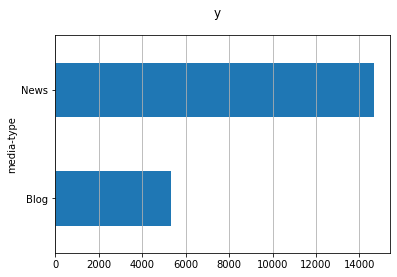

In [64]:
fig, ax = plt.subplots()
fig.suptitle("y", fontsize=12)
df["media-type"].reset_index().groupby("media-type").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [65]:
# import re
# import spacy
# nlp = spacy.load("en_core_web_sm")
import re
import nltk

In [66]:
# def clean(text):  
   
#     text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
#     return text

# def process(text):    ##You should be careful though about not stripping punctuations before word contractions are handled by the lemmatizer.
   
#     tokenizer = nlp.Defaults.create_tokenizer(nlp)
#     tokens = tokenizer(text)
#     lemma_list = []
#     for token in tokens:
#         if token.is_stop is False:
#             token_preprocessed = clean(token.lemma_)
#             if token_preprocessed != '':
#                 lemma_list.append(token_preprocessed)
            
            
#     text = " ".join(lemma_list)   
#     return text
    
    
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
   
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    content = " ".join(lst_text)
    return content
    




    

In [67]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [68]:
# df["text_clean"] = df["content"].apply(lambda x: 
#           process(x))
df["text_clean"] = df["content"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))


In [69]:
df.head()

,media-type,title,content,text_clean
0,News,Worcester breakfast club for veterans gives hu...,VETERANS saluted Worcester's first ever breakf...,veteran saluted worcester first ever breakfast...
1,News,Jumpshot Gives Marketers Renewed Visibility In...,New Product Gives Marketers Access to Real Key...,new product give marketer access real keywords...
2,Blog,The Return Of The Nike Air Max Sensation Has 8...,Home »\rStyle » The Return Of The Nike Air Max...,home style return nike air max sensation 80 ba...
3,Blog,This New Dating App Will Ruin Your Internet Game,NYMag.com Daily Intelligencer Vulture The Cut ...,nymagcom daily intelligencer vulture cut scien...
4,News,Pay up or face legal action: DBKL,"KUALA LUMPUR, Sept 15 (MySinchew) -- The Kuala...",kuala lumpur sept 15 mysinchew kuala lumpur ci...


In [70]:
from sklearn import feature_extraction,model_selection,naive_bayes,pipeline,preprocessing,feature_selection,preprocessing,metrics
import numpy as np


In [71]:
df_train,df_test = model_selection.train_test_split(df,test_size=0.3)
y_train = df_train["media-type"].values
y_test = df_test["media-type"].values

In [72]:
y_train

array(['News', 'News', 'News', ..., 'News', 'Blog', 'News'], dtype=object)

In [73]:
# #classic counting
vectorizer = feature_extraction.text.CountVectorizer(max_features= 10000,ngram_range=(1,2))
#tf-idf
vectorizer = feature_extraction.text.TfidfVectorizer(max_features = 10000,ngram_range=(1,2))

In [74]:
corpus = df_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [75]:

# for i in sorted (dic_vocabulary) : 
#     print ((i, dic_vocabulary[i]), end =" ") 



Text(0.5, 1, 'Sparse Matrix Sample')

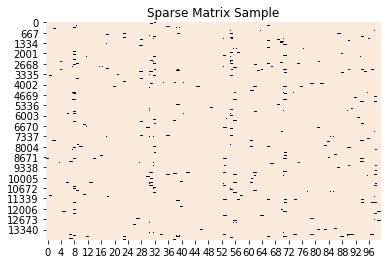

In [76]:

sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0,vmin=0,vmax=1,cbar=False).set_title('Sparse Matrix Sample')
# where the .shape[1] is the first scaler value of the shape of xtrain.
# csc_matrix.todense(self, order=None, out=None)[source]
# Return a dense matrix representation of this matrix.

In [77]:
# arr = X_train.toarray()
# dtf = pd.DataFrame(arr,columns=vectorizer.get_feature_names())

In [78]:
# #treat each category as binary (for example, the “Tech” category is 1 for the Tech news and 0 for the others);
# #performing a Chi-Square test to determine whether a feature and the (binary) target are independent;

# #mathematical approch
# binarized = preprocessing.LabelBinarizer().fit_transform(y_train)
# observed_count = np.dot(binarized.T,arr)

# class_prob = binarized.mean(axis=0).reshape(1,-1)
# feature_count = arr.sum(axis=0).reshape(1,-1)
# expected = np.dot(class_prob.T,feature_count)

# chisq = (observed_count - expected) ** 2 / expected
# chisq_score = chisq.sum(axis = 0)
# print(chisq_score)






In [79]:
#For the returned tuple, the first element is the chi-square scores, the scores are better if greater
#The second element is the p-values, they are better if smaller.
#Algorithimic approch
# chi2score,p = feature_selection.chi2(arr, y_train)
# print(chi2score)

In [80]:
#keep only the features with a certain p-value from the Chi-Square test.
y = df_train['media-type']
X_names = vectorizer.get_feature_names()
# p_limit_value = min(p)
df_features = pd.DataFrame()
for i in np.unique(y):
    chi,p = feature_selection.chi2(X_train,y==i)
    df_features = df_features.append(pd.DataFrame({"feature":X_names,"score":1-p,"y":i}))
    df_features = df_features.sort_values(["y","score"],ascending=[True,False])
df_features = df_features[df_features["score"]>min(p)]
X_names = df_features["feature"].unique().tolist()  

In [81]:
min(p)

1.2725172694484536e-12

In [82]:
# df_features

In [83]:
# len(X_names)

In [84]:
for cat in np.unique(y):
    print("# {}:".format(cat))
    print("  . selected features:",
         len(df_features[df_features["y"]==cat]))
    print("  . top features:", ",".join(df_features[df_features["y"]==cat]["feature"].values[:10]))
    print(" ")

# Blog:
  . selected features: 10000
  . top features: said,god,post,blog,market,love,coupon,pinterest,company,facebookshare
 
# News:
  . selected features: 10000
  . top features: said,god,post,blog,market,love,coupon,pinterest,company,facebookshare
 


In [85]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [86]:
classifier = naive_bayes.MultinomialNB()

In [87]:
model = pipeline.Pipeline([("vectorizer", vectorizer),("classifier", classifier)])

model["classifier"].fit(X_train,y_train)

X_test = df_test["text_clean"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [88]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
# cm = metrics.confusion_matrix(y_test, predicted)
# fig, ax = plt.subplots()
# sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
#             cbar=False)
# ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
#        yticklabels=classes, title="Confusion matrix")
# plt.yticks(rotation=0)

# fig, ax = plt.subplots(nrows=1, ncols=2)
# ## Plot roc
# for i in range(len(classes)):
#     fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
#                            predicted_prob[:,i])
#     ax[0].plot(fpr, tpr, lw=3, 
#               label='{0} (area={1:0.2f})'.format(classes[i], 
#                               metrics.auc(fpr, tpr))
#                )
# ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
# ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
#           xlabel='False Positive Rate', 
#           ylabel="True Positive Rate (Recall)", 
#           title="Receiver operating characteristic")
# ax[0].legend(loc="lower right")
# ax[0].grid(True)
    
## Plot precision-recall curve
# for i in range(len(classes)):
#     precision, recall, thresholds = metrics.precision_recall_curve(
#                  y_test_array[:,i], predicted_prob[:,i])
#     ax[1].plot(recall, precision, lw=3, 
#                label='{0} (area={1:0.2f})'.format(classes[i], 
#                                   metrics.auc(recall, precision))
#               )
# ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
#           ylabel="Precision", title="Precision-Recall curve")
# ax[1].legend(loc="best")
# ax[1].grid(True)
# plt.show()

ValueError: bad input shape (6000, 2)